In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

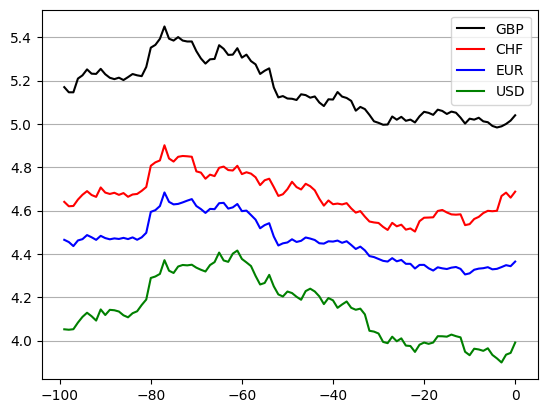

In [42]:
currencies = [
    {
        "symbol":'GBP',
        "color":'black'
    },
    {
        "symbol":'CHF',
        "color":'red'
    },
    {
        "symbol":'EUR',
        "color":'blue'
    },
    {
        "symbol":'USD',
        "color":'green'
    }]

dfs = []
for c in currencies:
    url = f"http://api.nbp.pl/api/exchangerates/rates/A/{c['symbol']}/last/100"
    response = requests.request("GET", url)
    df = pd.DataFrame.from_dict(response.json()['rates'])
    # df['effectiveDate'] = pd.to_datetime(df['effectiveDate'], format="%Y-%m-%d")
    dfs.append(df['mid'])

x = np.linspace(-100+1, 0, 100)

for i in range(0,len(dfs)):
    plt.plot(x, dfs[i], label=currencies[i]['symbol'], color=currencies[i]['color'])
plt.grid(axis='y', which='major')
plt.legend()
plt.show()